<a href="https://colab.research.google.com/github/williamlapa/categorizar_ccee/blob/master/PrepML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Machine Learning


In [1]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Apresentação do Dataset

In [2]:

# leitura de todos os csvs

path_ccee='/content/drive/MyDrive/ml/entrada'
import pandas as pd
import numpy as np

from os import listdir
from os.path import isfile, join

onlyfiles =  ([f"{f}" for f in listdir(path_ccee) if isfile(join(path_ccee, f))])
print(onlyfiles)


['Descritivo Simplificado de Ajustes_Fevereiro20_Final.xlsx', 'Descritivo Simplificado de Ajustes_Dezembro20_Contabilizaç¦o.xlsx', 'Descritivo Simplificado de Ajustes_Julho20_Contabilizaç¦o.xlsx', 'Descritivo Simplificado de Ajustes_Novembro20_Contabilizaç¦o.xlsx', 'Descritivo Simplificado de Ajustes_Outubro20_Contabilizaç¦o.xlsx', 'Descritivo Simplificado de Ajustes_Setembro20_Contabilizaç¦o.xlsx', 'Descritivo de Ajustes e Impactos aos Agentes - Contab de Abr17.xlsx', 'Descritivo de Ajustes e Impactos aos Agentes - Contab de Out17.xlsx', 'Descritivo de Ajustes e Impactos aos Agentes - Contabilizaç¦o de Maio 2016.xlsx', 'Descritivo de Ajustes e Impactos aos Agentes_Jul19.xlsx', 'Descritivo de Ajustes e Impactos aos Agentes - Contab de Jun17.xlsx', 'Descritivo de Ajustes e Impactos aos Agentes - Contab de Mai17.xlsx', 'Descritivo de Ajustes e Impactos aos Agentes - Contab de Fev17.xlsx', 'Descritivo de Ajustes e Impactos aos Agentes - Contab de Jan17.xlsx', 'Descritivo de Ajustes 

In [6]:
#Aqui está a leitura
#primeiros os dados do output
path_acronimo='https://github.com/treakj/cienciadedados/blob/main/acronimos_rev2.xlsx?raw=true'
#path_tarifas='https://github.com/treakj/cienciadedados/blob/main/tarifas202019.zip'
#path_eventos='https://github.com/treakj/cienciadedados/blob/0aeef662bf8c068c218134868ee326c5faad8007/eventos.csv'



#leitura dos dados de entrada da CCEE
count=0
for name in onlyfiles:
  #na_values=-9999
  partial=pd.read_excel(f"{path_ccee}/{name}", skipfooter=1)
  if count>0:
    tot=tot.append(partial)
  else:
    tot=partial
  count+=1
tot

tot = tot[tot['Unnamed: 0'].notnull()]
tot.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1770 entries, 0 to 30
Data columns (total 6 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   Unnamed: 0                                         1770 non-null   float64
 1   Título do Ajuste - conforme relatório SUMÁRIO-001  1767 non-null   object 
 2   Descrição do Ajuste                                1767 non-null   object 
 3   Descrição de Impacto                               1767 non-null   object 
 4   Impacto Principal                                  1748 non-null   object 
 5   Observação                                         624 non-null    object 
dtypes: float64(1), object(5)
memory usage: 96.8+ KB


#### Link para Download do Dataset

In [24]:
acronimo = pd.read_excel(path_acronimo)
acronimo['Chave']=acronimo['NOME'].apply(lambda x: str(x).replace('(*)','').replace('_','-'))

tot['Chave']=tot['Título do Ajuste - conforme relatório SUMÁRIO-001'].apply(lambda x: str(x).replace('(*)','').replace('_','-').replace('                                         ','\n').split('\n')[0])

merged=tot.merge(acronimo, right_on='Chave', left_on='splitedajuste', how='left')
# merged=tot.join(acronimo,how='left', on='Chave')

merged['TIPO'].fillna('Sem categoria', inplace=True)
merged['Título do Ajuste - conforme relatório SUMÁRIO-001'].fillna('Título inexistente', inplace=True)
merged['Descrição do Ajuste'].fillna('', inplace=True)
merged['Descrição de Impacto'].fillna('', inplace=True)
merged['Impacto Principal'].fillna('', inplace=True)
# merged.loc[merged['Título do Ajuste - conforme relatório SUMÁRIO-001'].str.contains('Encargo Liquidação MCP'),'TIPO']='Não considerar'

merged.to_excel('saidamerged.xlsx')
!cp saidamerged.xlsx "drive/My Drive/ml/saida"


#pd.read_csv(path_eventos, sep=";" ,encoding='utf-8')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1770 entries, 0 to 30
Data columns (total 9 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   Unnamed: 0                                         1770 non-null   float64
 1   Título do Ajuste - conforme relatório SUMÁRIO-001  1767 non-null   object 
 2   Descrição do Ajuste                                1767 non-null   object 
 3   Descrição de Impacto                               1767 non-null   object 
 4   Impacto Principal                                  1748 non-null   object 
 5   Observação                                         624 non-null    object 
 6   splitedajuste                                      1770 non-null   object 
 7   Key                                                1770 non-null   object 
 8   Chave                                              1770 non-null   object 
dtypes: float64(

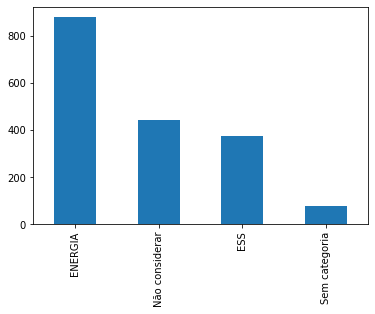

In [27]:
merged['TIPO'].value_counts().plot(kind='bar')
# acronimo = pd.read_excel(path_acronimo)
tot.info()
merged.info()
# tot.to_excel('teste.xlsx')
# !cp teste.xlsx "drive/My Drive/ml/"

In [29]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
pipeline = Pipeline([
    ('vect', CountVectorizer(max_df=1.0, max_features=50000,ngram_range=(1,2))),
    ('tfidf', TfidfTransformer(use_idf=True,norm='l2')),
    ('clf', SGDClassifier(loss='log',alpha=1e-06, penalty='elasticnet')), # default hinge. to get proba=log or modified_huber
])

In [43]:
merged['todas_as_colunas']=merged['Título do Ajuste - conforme relatório SUMÁRIO-001']+merged['Descrição do Ajuste']+merged['Descrição de Impacto']+merged['Impacto Principal']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(merged['todas_as_colunas'], merged['TIPO'], test_size=0.2, 
                                                    stratify=merged['TIPO'],random_state=1)

In [44]:
classificador = pipeline.fit(X_train, y_train)
classificador.score(X_test,y_test)

0.9661016949152542

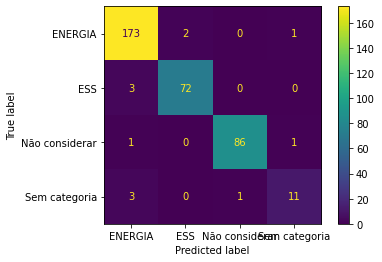

In [45]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(classificador, X_test, y_test, values_format='d')